# **IBMEC - Aula ao Vivo 02**

**Disciplina: Processamento de Áudio e Voz**

**prof: Sérgio Assunção Monteiro, DSc**


https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

#**Transformada Rápida de Fourier (FFT)**

75


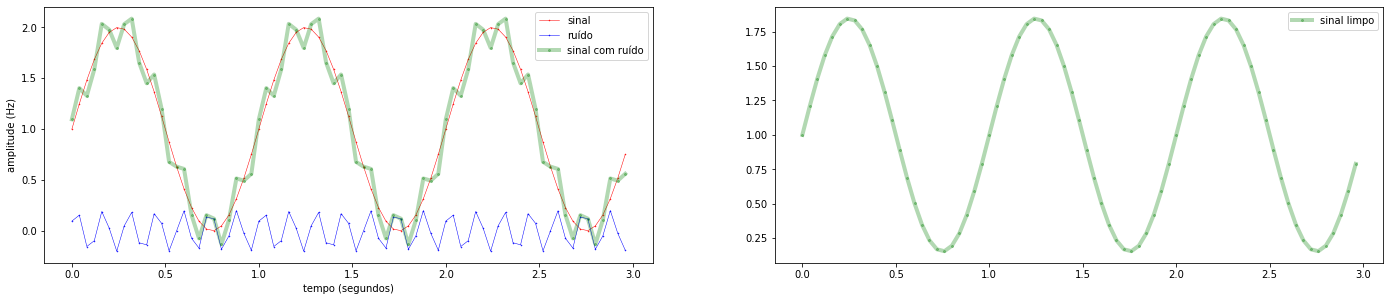

In [5]:
import numpy as np
import matplotlib.pyplot as p
%matplotlib inline

T=3 # secs
d=0.04 # secs
n=int(T/d)
print(n)
t=np.arange(0,T,d)  
fr=1 # Hz
y1= np.sin(2*np.pi*fr*t) +1          # dc offset helps with backconversion, try setting it to zero
y2= 1/5*np.sin(2*np.pi*7*fr*t+0.5) 
y=y1+y2 
f=np.fft.fftshift(np.fft.fft(y))
freq=np.fft.fftshift(np.fft.fftfreq(n,d))

filter=np.exp(- freq**2/6)  # simple Gaussian filter in the frequency domain
filtered_spectrum=f*filter  # apply the filter to the spectrum

filtered_data =  np.fft.ifft(filtered_spectrum)  # then backtransform to time domain


p.figure(figsize=(24,16))

p.subplot(321)
p.plot(t,y1,'.-',color='red', lw=0.5, ms=1, label='sinal')  
p.plot(t,y2,'.-',color='blue', lw=0.5,ms=1, label='ruído') 
p.plot(t,y,'.-',color='green', lw=4, ms=4, alpha=0.3, label='sinal com ruído') 
p.xlabel('tempo (segundos)')
p.ylabel('amplitude (Hz)')
p.legend()

p.subplot(322)
p.plot(t,  np.absolute(filtered_data),'.-',color='green', lw=4, ms=4, alpha=0.3, label='sinal limpo')
p.legend()


# **Filtros**

In [6]:
# import required library
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [7]:
#Geração de dados
# Specifications of the filter
f1 = 25  # Frequency of 1st signal
f2 = 50  # Frequency of 2nd signal
N = 10  # Order of the filter
  
# Generate the time vector of 1 sec duration
t = np.linspace(0, 1, 1000)  # Generate 1000 samples in 1 sec
  
# Generate the signal containing f1 and f2
sig = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

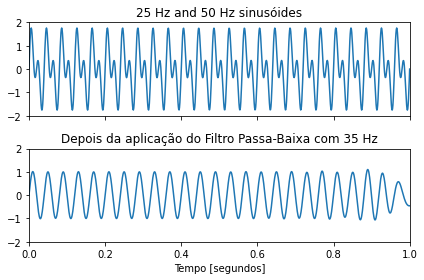

In [8]:
# Plotar o sinal
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('25 Hz and 50 Hz sinusóides')
ax1.axis([0, 1, -2, 2])  
# Aplicar o filtro Butterworth usando
# signal.butter e output='sos'
sos = signal.butter(50, 35, 'lp', fs=1000, output='sos')
# Filtrar o sinal pelo filtro usando signal.sosfilt
# Usar signal.sosfiltfilt para obter a fase de saída com entrada
filtered = signal.sosfiltfilt(sos, sig)
# Plotar o sinal de saída
ax2.plot(t, filtered)
ax2.set_title('Depois da aplicação do Filtro Passa-Baixa com 35 Hz')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Tempo [segundos]')
plt.tight_layout()
plt.show()

# **Transformar Texto em Áudio**

In [ ]:
#Esse programa deve ser executado no PyCharm
import speech_recognition as sr

def obter_audio(microfone):
    with sr.Microphone() as source:
        microfone.adjust_for_ambient_noise(source)
        print("Diga alguma coisa: ")
        audio = microfone.listen(source)
    return audio

def transformar_audio_em_texto(microfone, audio):
    try:
        frase = microfone.recognize_google(audio, language='pt-BR')
        return frase
    except sr.UnkownValueError:
        print("Não entendi")


def escutar_microfone():
    microfone = sr.Recognizer()
    audio = obter_audio(microfone)
    texto =  transformar_audio_em_texto(microfone, audio)
    return texto

if __name__ == '__main__':
    texto = escutar_microfone()
    print("A frase que você disse foi: " + texto)